In [1]:
# import packages
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

from dfply import *
from more_dfply import *

# Module 5 Homework - Cleaning Up the MoMA Artwork 

In this lab, you will put your Pandas data cleaning skills to the test by cleaning up the MoMA artwork csv file.  Solve each of the following problems using the functions from `dfply`.  

For each problem, perform two steps.

1. Explore the specified column using the techniques from the last lecture.
2. Fix all issues found in part 1.

**Note that I will be looking for a literate, easy to follow, set of code and markdown cells.**  Part of your score will be determined by the cleanliness/conciseness of your presentation.

Where possible, solve each problem with one pipe.

#### Read in artwork

In [2]:
artwork = (pd.read_csv("./data/Artworks.csv")
           >> fix_names
           >> mutate(id = X.index + 1)
          )
artwork.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,Seat_Height_cm,Duration_sec,id
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN,1
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN,2
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN,3
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN,4
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN,5


#### Read in artists

In [3]:
artists = (pd.read_csv("./data/Artists.csv")
           >> fix_names
          )

artists.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki_QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


## Problem 1
    
**Task:** Explore the values of `artist.EndDate` and fix any issues.


In [4]:
artists.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki_QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


In [5]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15222 entries, 0 to 15221
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConstituentID  15222 non-null  int64  
 1   DisplayName    15222 non-null  object 
 2   ArtistBio      13017 non-null  object 
 3   Nationality    12770 non-null  object 
 4   Gender         12081 non-null  object 
 5   BeginDate      15222 non-null  int64  
 6   EndDate        15222 non-null  int64  
 7   Wiki_QID       3255 non-null   object 
 8   ULAN           2933 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 1.0+ MB


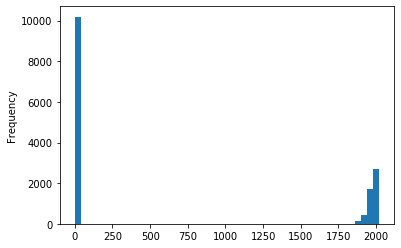

In [6]:
artists.EndDate.plot(kind='hist', bins = 50)

In [7]:
# solution
replace_zero = {0:np.NaN}

artists_fix = (artists 
               >> mutate(death_date = (X.EndDate
                         .apply(lambda y: y if int(y) > 0 else np.nan)
                         .astype('Int64')))
               )
artists_fix.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki_QID,ULAN,death_date
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN,1992
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN,<NA>
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN,<NA>
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0,<NA>
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN,<NA>


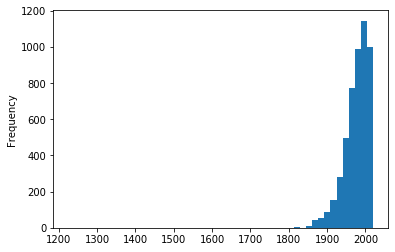

In [8]:
# check for 0s
artists_fix.death_date.plot(kind='hist', bins = 50)

## Problem 2
    
**Task:** Fix the issues with `artwork.Gender`

In [27]:
artwork.Gender.str.split(' ', expand=True)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,(Male),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,(Male),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,(Male),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,(Male),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,(Male),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138146,(),(Male),(Male),None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
138147,(Female),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
138148,(Female),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
138149,(Female),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [28]:
gender_col = ['Gender_1','Gender_2','Gender_3','Gender_4','Gender_5',
              'Gender_6','Gender_7','Gender_8','Gender_9','Gender_10',
              'Gender_11','Gender_12','Gender_13','Gender_14','Gender_15',
              'Gender_16','Gender_17','Gender_18','Gender_19','Gender_20',
              'Gender_21','Gender_22','Gender_23','Gender_24','Gender_25',
              'Gender_26','Gender_27','Gender_28','Gender_29','Gender_30',
              'Gender_31','Gender_32','Gender_33','Gender_34','Gender_35',
              'Gender_36','Gender_37','Gender_38','Gender_39','Gender_40',
              'Gender_41','Gender_42','Gender_43','Gender_44','Gender_45',
              'Gender_46','Gender_47']

artwork_clean = (artwork
                 #>> select(X.Gender)
                 >> filter_by(~X.Gender.isna())
                 >> mutate(Gender = artwork['Gender'].str.replace(r'[\(\)]', '',regex=True))
                 >> separate(X.Gender, 
                             gender_col, 
                             sep=' ', 
                             remove=True, 
                             convert=True,
                             extra='merge',
                             fill='right')
                )
artwork_clean

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Date,Medium,Dimensions,...,Gender_38,Gender_39,Gender_40,Gender_41,Gender_42,Gender_43,Gender_44,Gender_45,Gender_46,Gender_47
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138146,Untitled,"Chesnutt Brothers Studio, Andrew Chesnutt, Lew...","133005, 133006, 133007","(American, 1861–1934) (American, 1860–1933)",() (American) (American),(0) (1861) (1860),(0) (1934) (1933),c. 1890,Gelatin silver print,"4 1/4 × 6 1/2"" (10.8 × 16.5 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138147,Plate (folio 2 verso) from Muscheln und schirm...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),1939,One from an illustrated book with four line bl...,"composition: 5 5/16 × 3 15/16"" (13.5 × 10 cm);...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138148,Plate (folio 6) from Muscheln und schirme (She...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),1939,One from an illustrated book with four line bl...,"composition: 5 5/16 × 3 15/16"" (13.5 × 10 cm);...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138149,Plate (folio 12) from Muscheln und schirme (Sh...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),1939,One from an illustrated book with four line bl...,"composition: 4 5/16 × 3 15/16"" (11 × 10 cm); p...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
artwork_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136868 entries, 0 to 138150
Data columns (total 76 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Title             136854 non-null  object 
 1   Artist            136868 non-null  object 
 2   ConstituentID     136868 non-null  object 
 3   ArtistBio         132226 non-null  object 
 4   Nationality       136868 non-null  object 
 5   BeginDate         136868 non-null  object 
 6   EndDate           136868 non-null  object 
 7   Date              134999 non-null  object 
 8   Medium            127463 non-null  object 
 9   Dimensions        127627 non-null  object 
 10  CreditLine        134480 non-null  object 
 11  AccessionNumber   136868 non-null  object 
 12  Classification    136868 non-null  object 
 13  Department        136868 non-null  object 
 14  DateAcquired      129944 non-null  object 
 15  Cataloged         136868 non-null  object 
 16  ObjectID          13

In [30]:
new_gender = {'Male':'m', 'Female':'f', 'male':'m', 'female':'f', 'Non-Binary':'nb', 'Non-binary':'nb'}

artwork_clean_1 = (artwork_clean
                   >> gather('Gender_col', 'Gender', columns_from('Gender_1'))
                   >> filter_by(~X.Gender.isna())
                   >> drop(X.Gender_col)
                   >> mutate(Gender = X.Gender.map(new_gender))
                  ).reset_index(drop=True)

artwork_clean_1.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Date,Medium,Dimensions,...,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,Seat_Height_cm,Duration_sec,id,Gender
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",...,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN,1,m
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",...,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN,2,m
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",...,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN,3,m
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",...,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN,4,m
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",...,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN,5,m


In [31]:
artwork_clean_1['Gender'].value_counts()

m     119628
f      21419
nb        13
Name: Gender, dtype: int64

In [32]:
artwork_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141060 entries, 0 to 141059
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Title             141044 non-null  object 
 1   Artist            141060 non-null  object 
 2   ConstituentID     141060 non-null  object 
 3   ArtistBio         140568 non-null  object 
 4   Nationality       141060 non-null  object 
 5   BeginDate         141060 non-null  object 
 6   EndDate           141060 non-null  object 
 7   Date              139308 non-null  object 
 8   Medium            132026 non-null  object 
 9   Dimensions        132193 non-null  object 
 10  CreditLine        138644 non-null  object 
 11  AccessionNumber   141060 non-null  object 
 12  Classification    141060 non-null  object 
 13  Department        141060 non-null  object 
 14  DateAcquired      134440 non-null  object 
 15  Cataloged         141060 non-null  object 
 16  ObjectID          14

## Problem 3
    
**Task:** Fix the issues with `artwork.BeginDate` and `artwork.EndDate`.  Note that you will want to convert to `.astype('int64')` at the end of the expression.

#### BeginDate

In [33]:
artwork_clean_1.BeginDate.str.split(' ', expand=True)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,(1841),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,(1944),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,(1876),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,(1944),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,(1876),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141055,(0),(1943),(1947),(1922),(1927),(1951),(1940),(1945),(1943),(1947),...,(1943),(1948),(0),(1945),(1938),(1942),(1950),(1941),(1947),(1941)
141056,(0),(1943),(1947),(1922),(1927),(1951),(1940),(1945),(1943),(1947),...,(1943),(1948),(0),(1945),(1938),(1942),(1950),(1941),(1947),(1941)
141057,(0),(1943),(1947),(1922),(1927),(1951),(1940),(1945),(1943),(1947),...,(1943),(1948),(0),(1945),(1938),(1942),(1950),(1941),(1947),(1941)
141058,(0),(1943),(1947),(1922),(1927),(1951),(1940),(1945),(1943),(1947),...,(1943),(1948),(0),(1945),(1938),(1942),(1950),(1941),(1947),(1941)


In [34]:
begin_col = ['begin_1','begin_2','begin_3','begin_4','begin_5',
              'begin_6','begin_7','begin_8','begin_9','begin_10',
              'begin_11','begin_12','begin_13','begin_14','begin_15',
              'begin_16','begin_17','begin_18','begin_19','begin_20',
              'begin_21','begin_22','begin_23','begin_24','begin_25',
              'begin_26','begin_27','begin_28','begin_29','begin_30',
              'begin_31','begin_32','begin_33','begin_34','begin_35',
              'begin_36','begin_37','begin_38','begin_39','begin_40',
              'begin_41','begin_42','begin_43','begin_44','begin_45',
              'begin_46','begin_47']

artwork_clean_2 = (artwork_clean_1
                   #>> select(X.BeginDate)
                   >> filter_by(~X.BeginDate.isna())
                   >> mutate(BeginDate = X.BeginDate.str.replace(r'[\(\)]', '',regex=True))
                   >> separate(X.BeginDate, 
                                begin_col, 
                                sep=' ', 
                                remove=True, 
                                convert=True,
                                extra='merge',
                                fill='right')
                    )
artwork_clean_2.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,EndDate,Date,Medium,Dimensions,CreditLine,...,begin_38,begin_39,begin_40,begin_41,begin_42,begin_43,begin_44,begin_45,begin_46,begin_47
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1918),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(0),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchinc...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1957),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",Gift of Jo Carole and Ronald S. Lauder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(0),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",Purchase and partial gift of the architect in ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1957),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",Gift of Jo Carole and Ronald S. Lauder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
artwork_clean_3 = (artwork_clean_2
                   >> gather('Begin_col', 'Birth', columns_from('begin_1'))
                   >> filter_by(~X.Birth.isna())
                   >> drop(X.Begin_col)
                   >> mutate(Birth = (X.Birth
                             .apply(lambda y: y if int(y) > 0 else np.nan)
                             .astype('Int64')))
                  ).reset_index(drop=True)

artwork_clean_3.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,EndDate,Date,Medium,Dimensions,CreditLine,...,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,Seat_Height_cm,Duration_sec,id,Gender,Birth
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1918),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,...,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN,1,m,1841
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(0),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchinc...,...,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN,2,m,1944
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1957),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",Gift of Jo Carole and Ronald S. Lauder,...,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN,3,m,1876
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(0),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",Purchase and partial gift of the architect in ...,...,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN,4,m,1944
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1957),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",Gift of Jo Carole and Ronald S. Lauder,...,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN,5,m,1876


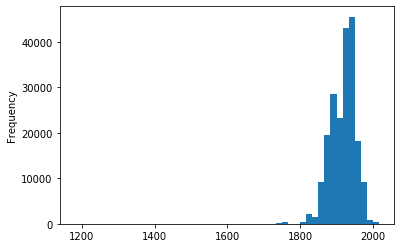

In [20]:
artwork_clean_3.Birth.plot(kind='hist', bins = 50)

#### EndDate

In [22]:
artwork_clean_3.EndDate.str.split(' ', expand=True)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,(1918),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,(0),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,(1957),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,(0),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,(1957),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225523,(0),(0),(0),(2011),(2017),(1992),(0),(0),(0),(0),...,(0),(0),(0),(0),(0),(0),(0),(0),(0),(0)
225524,(0),(0),(0),(2011),(2017),(1992),(0),(0),(0),(0),...,(0),(0),(0),(0),(0),(0),(0),(0),(0),(0)
225525,(0),(0),(0),(2011),(2017),(1992),(0),(0),(0),(0),...,(0),(0),(0),(0),(0),(0),(0),(0),(0),(0)
225526,(0),(0),(0),(2011),(2017),(1992),(0),(0),(0),(0),...,(0),(0),(0),(0),(0),(0),(0),(0),(0),(0)


In [23]:
end_col = ['begin_1','begin_2','begin_3','begin_4','begin_5',
              'begin_6','begin_7','begin_8','begin_9','begin_10',
              'begin_11','begin_12','begin_13','begin_14','begin_15',
              'begin_16','begin_17','begin_18','begin_19','begin_20',
              'begin_21','begin_22','begin_23','begin_24','begin_25',
              'begin_26','begin_27','begin_28','begin_29','begin_30',
              'begin_31','begin_32','begin_33','begin_34','begin_35',
              'begin_36','begin_37','begin_38','begin_39','begin_40',
              'begin_41','begin_42','begin_43','begin_44','begin_45',
              'begin_46','begin_47'] 

artwork_clean_4 = (artwork_clean_3
                   #>> select(X.EndDate)
                   >> filter_by(~X.EndDate.isna())
                   >> mutate(EndDate = X.EndDate.str.replace(r'[\(\)]', '',regex=True))
                   >> separate(X.EndDate, 
                                end_col, 
                                sep=' ', 
                                remove=True, 
                                convert=True,
                                extra='merge',
                                fill='right')
                    )
artwork_clean_4

,Title,Artist,ConstituentID,ArtistBio,Nationality,Date,Medium,Dimensions,CreditLine,AccessionNumber,...,begin_38,begin_39,begin_40,begin_41,begin_42,begin_43,begin_44,begin_45,begin_46,begin_47
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,885.1996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchinc...,1.1995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",Gift of Jo Carole and Ronald S. Lauder,1.1997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",Purchase and partial gift of the architect in ...,2.1995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",Gift of Jo Carole and Ronald S. Lauder,2.1997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225523,Artifacts at the End of a Decade,"Various Artists, Harry Anderson, Laurie Anders...","6105, 6848, 6807, 66807, 6809, 6810, 6811, 681...","(American) (American, born 1943) (American, bo...",(American) (American) (American) (American) (A...,1981,Portfolio of forty-four mixed medium prints,NaN,Gift of Joseph Daniel Cahill Masheck,481.1986.1-44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225524,Artifacts at the End of a Decade,"Various Artists, Harry Anderson, Laurie Anders...","6105, 6848, 6807, 66807, 6809, 6810, 6811, 681...","(American) (American, born 1943) (American, bo...",(American) (American) (American) (American) (A...,1981,Portfolio of forty-four mixed medium prints,NaN,Gift of Joseph Daniel Cahill Masheck,481.1986.1-44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225525,Artifacts at the End of a Decade,"Various Artists, Harry Anderson, Laurie Anders...","6105, 6848, 6807, 66807, 6809, 6810, 6811, 681...","(American) (American, born 1943) (American, bo...",(American) (American) (American) (American) (A...,1981,Portfolio of forty-four mixed medium prints,NaN,Gift of Joseph Daniel Cahill Masheck,481.1986.1-44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225526,Artifacts at the End of a Decade,"Various Artists, Harry Anderson, Laurie Anders...","6105, 6848, 6807, 66807, 6809, 6810, 6811, 681...","(American) (American, born 1943) (American, bo...",(American) (American) (American) (American) (A...,1981,Portfolio of forty-four mixed medium prints,NaN,Gift of Joseph Daniel Cahill Masheck,481.1986.1-44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
artwork_clean_5 = (artwork_clean_4
                   >> gather('Death_col', 'Death', columns_from('begin_1'))
                   >> filter_by(~X.Death.isna())
                   >> drop(X.Death_col)
                   >> mutate(Death = (X.Death
                             .apply(lambda y: y if int(y) > 0 else np.nan)
                             .astype('Int64')))
                  ).reset_index(drop=True)

artwork_clean_5

,Title,Artist,ConstituentID,ArtistBio,Nationality,Date,Medium,Dimensions,CreditLine,AccessionNumber,...,Height_cm,Length_cm,Weight_kg,Width_cm,Seat_Height_cm,Duration_sec,id,Gender,Birth,Death
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,885.1996,...,48.6000,NaN,NaN,168.9000,NaN,NaN,1,m,1841,1918
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchinc...,1.1995,...,40.6401,NaN,NaN,29.8451,NaN,NaN,2,m,1944,<NA>
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",Gift of Jo Carole and Ronald S. Lauder,1.1997,...,34.3000,NaN,NaN,31.8000,NaN,NaN,3,m,1876,1957
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",Purchase and partial gift of the architect in ...,2.1995,...,50.8000,NaN,NaN,50.8000,NaN,NaN,4,m,1944,<NA>
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",Gift of Jo Carole and Ronald S. Lauder,2.1997,...,38.4000,NaN,NaN,19.1000,NaN,NaN,5,m,1876,1957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386827,Artifacts at the End of a Decade,"Various Artists, Harry Anderson, Laurie Anders...","6105, 6848, 6807, 66807, 6809, 6810, 6811, 681...","(American) (American, born 1943) (American, bo...",(American) (American) (American) (American) (A...,1981,Portfolio of forty-four mixed medium prints,NaN,Gift of Joseph Daniel Cahill Masheck,481.1986.1-44,...,NaN,NaN,NaN,NaN,NaN,NaN,65448,m,1941,<NA>
1386828,Artifacts at the End of a Decade,"Various Artists, Harry Anderson, Laurie Anders...","6105, 6848, 6807, 66807, 6809, 6810, 6811, 681...","(American) (American, born 1943) (American, bo...",(American) (American) (American) (American) (A...,1981,Portfolio of forty-four mixed medium prints,NaN,Gift of Joseph Daniel Cahill Masheck,481.1986.1-44,...,NaN,NaN,NaN,NaN,NaN,NaN,65448,m,1941,<NA>
1386829,Artifacts at the End of a Decade,"Various Artists, Harry Anderson, Laurie Anders...","6105, 6848, 6807, 66807, 6809, 6810, 6811, 681...","(American) (American, born 1943) (American, bo...",(American) (American) (American) (American) (A...,1981,Portfolio of forty-four mixed medium prints,NaN,Gift of Joseph Daniel Cahill Masheck,481.1986.1-44,...,NaN,NaN,NaN,NaN,NaN,NaN,65448,f,1941,<NA>
1386830,Artifacts at the End of a Decade,"Various Artists, Harry Anderson, Laurie Anders...","6105, 6848, 6807, 66807, 6809, 6810, 6811, 681...","(American) (American, born 1943) (American, bo...",(American) (American) (American) (American) (A...,1981,Portfolio of forty-four mixed medium prints,NaN,Gift of Joseph Daniel Cahill Masheck,481.1986.1-44,...,NaN,NaN,NaN,NaN,NaN,NaN,65448,m,1941,<NA>


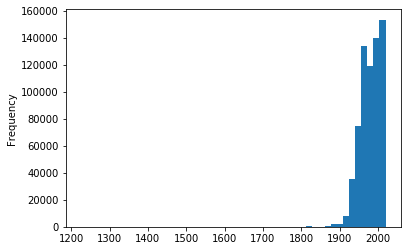

In [25]:
artwork_clean_5.Death.plot(kind='hist', bins = 50)

## Problem 4
    
**Task:** Use `value_counts` to identify some issues with `artwork.Artist` and `artwork.Nationality`.  Discuss some strategies to solve these issues.  Do your best to clean these columns up.

#### Strategies:
    - Both columns are somewhat similar to Gender when it comes to seperating but I plan on checking what needs to be renamed after splitting them. I plan on making some variables more generic (Unknowns) and renaming them to change spaces to underscores. One problem was that value_counts() does not show all the unique values.  

#### Nationality

In [11]:
artwork.Nationality.value_counts()

(American)                                                                                                                             56963
(French)                                                                                                                               22589
(German)                                                                                                                                9239
(British)                                                                                                                               5576
()                                                                                                                                      5025
                                                                                                                                       ...  
(British) (Australian)                                                                                                                     1
(Swedish) (Ir

In [12]:
artwork.Nationality.str.split(' ', expand=True)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,(Austrian),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,(French),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,(Austrian),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,(),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,(Austrian),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138146,(),(American),(American),None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
138147,(Swiss),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
138148,(Swiss),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
138149,(Swiss),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [53]:
begin_col = ['begin_1','begin_2','begin_3','begin_4','begin_5',
              'begin_6','begin_7','begin_8','begin_9','begin_10',
              'begin_11','begin_12','begin_13','begin_14','begin_15',
              'begin_16','begin_17','begin_18','begin_19','begin_20',
              'begin_21','begin_22','begin_23','begin_24','begin_25',
              'begin_26','begin_27','begin_28','begin_29','begin_30',
              'begin_31','begin_32','begin_33','begin_34','begin_35',
              'begin_36','begin_37','begin_38','begin_39','begin_40',
              'begin_41','begin_42','begin_43','begin_44','begin_45',
              'begin_46','begin_47']

artwork_clean_nation = (artwork
                        >> select(X.Nationality)
                        >> filter_by(~X.Nationality.isna())
                        >> mutate(Nationality = X.Nationality.str.replace(r'nationality unknown', 'Unknown'))
                        >> mutate(Nationality = X.Nationality.str.replace(r'Nationality unknown', 'Unknown'))
                        >> mutate(Nationality = X.Nationality.str.replace(r'Nationality Unknown', 'Unknown'))
                        >> mutate(Nationality = X.Nationality.str.replace(r'Native American', 'Native_American'))
                        >> mutate(Nationality = X.Nationality.str.replace(r'New Zealander', 'New_Zealander'))
                        >> mutate(Nationality = X.Nationality.str.replace(r'South African', 'South_African'))
                        >> mutate(Nationality = X.Nationality.str.replace(r'Costa Rican', 'Costa_Rican'))
                        >> mutate(Nationality = X.Nationality.str.replace(r'Puerto Rican', 'Puerto_Rican'))
                        >> mutate(Nationality = X.Nationality.str.replace(r'Canadian Inuit', 'Canadian_Inuit'))
                        >> mutate(Nationality = X.Nationality.str.replace(r'Sierra Leonean', 'Sierra_Leonean'))
                        >> mutate(Nationality = X.Nationality.str.replace(r'[\(\)]', '', regex=True))
                        >> separate(X.Nationality, 
                                      begin_col, 
                                      sep=' ', 
                                      remove=True, 
                                      convert=True,
                                      extra='merge',
                                      fill='right')
                    )

artwork_clean_nation

,begin_1,begin_2,begin_3,begin_4,begin_5,begin_6,begin_7,begin_8,begin_9,begin_10,...,begin_38,begin_39,begin_40,begin_41,begin_42,begin_43,begin_44,begin_45,begin_46,begin_47
0,Austrian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,French,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Austrian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Austrian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138146,NaN,American,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138147,Swiss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138148,Swiss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138149,Swiss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
nationality_cleaned = (artwork_clean_nation
                   >> gather('Nationality_col', 'nationality', columns_from('begin_1'))
                   >> filter_by(~X.nationality.isna())
                   >> drop(X.Nationality_col)
                  ).reset_index(drop=True)

nationality_cleaned

,nationality
0,Austrian
1,French
2,Austrian
3,Austrian
4,American
...,...
144080,American
144081,American
144082,American
144083,American


In [55]:
# reference
nationality_cleaned['nationality'].unique()

array(['Austrian', 'French', 'American', 'German', 'Dutch', 'Italian',
       'Swedish', 'British', 'Japanese', 'Argentine', 'Brazilian',
       'Swiss', 'Luxembourgish', 'Spanish', 'Russian', 'Iranian',
       'Finnish', 'Unknown', 'Danish', 'Belgian', 'Czech', 'Moroccan',
       'Coptic', 'Persian', 'Canadian', 'Colombian', 'Australian',
       'Chinese', 'Mexican', 'Yugoslav', 'Scottish', 'Hungarian',
       'Polish', 'Slovenian', 'Chilean', 'Latvian', 'Greek', 'Israeli',
       'Czechoslovakian', 'Icelandic', 'Croatian', 'Norwegian',
       'Ukrainian', 'Cuban', 'Romanian', 'Venezuelan', 'Uruguayan',
       'Georgian', 'Thai', 'Algerian', 'Guatemalan', 'Indian', 'Irish',
       'Costa_Rican', 'Korean', 'Ethiopian', 'Kuwaiti', 'Haitian',
       'South_African', 'Zimbabwean', 'Ecuadorian', 'Portuguese',
       'Panamanian', 'Peruvian', 'Congolese', 'Malian', 'Turkish',
       'Cambodian', 'Bosnian', 'Canadian_Inuit', 'Slovak', 'Estonian',
       'Pakistani', 'Bulgarian', 'Bolivian', 

#### Artists

In [56]:
artwork.Artist.value_counts()

Eugène Atget                5050
Louise Bourgeois            3336
Unknown photographer        2734
Ludwig Mies van der Rohe    2645
Jean Dubuffet               1435
                            ... 
Shuji Mukai                    1
Mokuma Kikuhata                1
Stella C. Salisbury            1
Waldo Díaz-Balart              1
Bob Rafelson                   1
Name: Artist, Length: 13684, dtype: int64

In [57]:
artwork.Artist.str.split(',', expand=True)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,Otto Wagner,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Christian de Portzamparc,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Emil Hoppe,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Bernard Tschumi,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Emil Hoppe,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138146,Chesnutt Brothers Studio,Andrew Chesnutt,Lewis Chesnutt,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
138147,Sophie Taeuber-Arp,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
138148,Sophie Taeuber-Arp,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
138149,Sophie Taeuber-Arp,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [107]:
begin_col = ['begin_1','begin_2','begin_3','begin_4','begin_5',
              'begin_6','begin_7','begin_8','begin_9','begin_10',
              'begin_11','begin_12','begin_13','begin_14','begin_15',
              'begin_16','begin_17','begin_18','begin_19','begin_20',
              'begin_21','begin_22','begin_23','begin_24','begin_25',
              'begin_26','begin_27','begin_28','begin_29','begin_30',
              'begin_31','begin_32','begin_33','begin_34','begin_35',
              'begin_36','begin_37','begin_38','begin_39','begin_40',
              'begin_41','begin_42','begin_43','begin_44','begin_45',
              'begin_46','begin_47']

artwork_clean_artists = (artwork
                         >> select(X.Artist)
                         >> filter_by(~X.Artist.isna())
                         >> mutate(Artist = X.Artist.str.replace(r' ', ''))
                         >> separate(X.Artist, 
                                         begin_col, 
                                         sep=',', 
                                         remove=True, 
                                         convert=True,
                                         extra='merge',
                                         fill='right')
                    )
artwork_clean_artists

,begin_1,begin_2,begin_3,begin_4,begin_5,begin_6,begin_7,begin_8,begin_9,begin_10,...,begin_38,begin_39,begin_40,begin_41,begin_42,begin_43,begin_44,begin_45,begin_46,begin_47
0,OttoWagner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ChristiandePortzamparc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EmilHoppe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BernardTschumi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EmilHoppe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138146,ChesnuttBrothersStudio,AndrewChesnutt,LewisChesnutt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138147,SophieTaeuber-Arp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138148,SophieTaeuber-Arp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138149,SophieTaeuber-Arp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
artists_cleaned = (artwork_clean_artists
                   >> gather('Artists_col', 'artists', columns_from('begin_1'))
                   >> filter_by(~X.artists.isna())
                   >> drop(X.Artists_col)
                  ).reset_index(drop=True)

artists_cleaned

,artists
0,OttoWagner
1,ChristiandePortzamparc
2,EmilHoppe
3,BernardTschumi
4,EmilHoppe
...,...
153704,BenedictTisa
153705,CurtisVanBuren
153706,WendaVonWeise
153707,PhilipWarner


In [109]:
artists_list = artists_cleaned['artists'].value_counts()
artists_index = artists_list.index

In [113]:
# reference
[a for a in artists_index.unique()]

['EugèneAtget',
 'LouiseBourgeois',
 'Unknownphotographer',
 'LudwigMiesvanderRohe',
 'JeanDubuffet',
 'LeeFriedlander',
 'PabloPicasso',
 'MarcChagall',
 'GeorgeMaciunas',
 'HenriMatisse',
 'VariousArtists',
 'PierreBonnard',
 'FrankLloydWright',
 'LillyReich',
 'AugustSander',
 'UnknownArtist',
 'BenKinmont',
 'JánosKender',
 'HarryShunk',
 'GeorgesRouault',
 'ÉmileBernard',
 'SolLeWitt',
 'AristideMaillol',
 'AndréDerain',
 'RaoulDufy',
 'JoanMiró',
 'MauriceDenis',
 'FrédéricBrulyBouabré',
 'DorotheaLange',
 'UnknownDesigner',
 'JanDibbets',
 'PierreAlechinsky',
 'JasperJohns',
 'JimDine',
 'Album-miscellaneous',
 'RobertRauschenberg',
 'BenVautier',
 'WalkerEvans',
 'GarryWinogrand',
 'JulesPascin',
 'RaymondPettibon',
 'Pope.L',
 'ThomasBewick',
 'AndréMasson',
 'AndyWarhol',
 'HenriCartier-Bresson',
 'JohnJensen',
 'JerryLewis',
 'EdwardSteichen',
 'ChristianBoltanski',
 'JosefAlbers',
 'AlexanderCalder',
 'NataliaGoncharova',
 'AleksandrRodchenko',
 'OdilonRedon',
 'RobertWatts